In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [5]:
digits_df = datasets.load_digits()
print('Digits dataset structure= ', dir(digits_df))
print('Data shape= ', digits_df.data.shape)
print('Data conatins pixel representation of each image, \n', digits_df.data)

Digits dataset structure=  ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
Data shape=  (1797, 64)
Data conatins pixel representation of each image, 
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


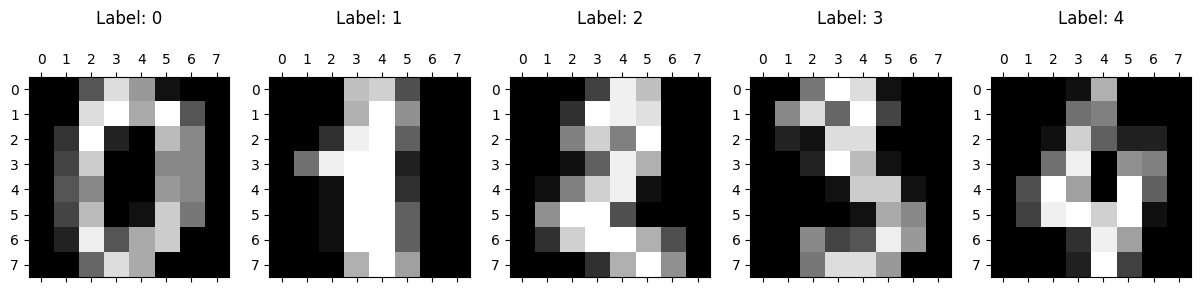

In [6]:
rows = 1
columns = 5
fig, ax =  plt.subplots(rows, columns, figsize = (15,6))

plt.gray()
for i in range(columns):
  ax[i].matshow(digits_df.images[i]) 
  ax[i].set_title('Label: %s\n' % digits_df.target_names[i])

plt.show()

In [8]:
X = digits_df.data
y = digits_df.target

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state = 1)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (1437, 64)
X_test dimension=  (360, 64)
y_train dimension=  (1437,)
y_train dimension=  (360,)


In [10]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

Predicted value is = [4]
Actual value from test data is 4 and corresponding image is as below


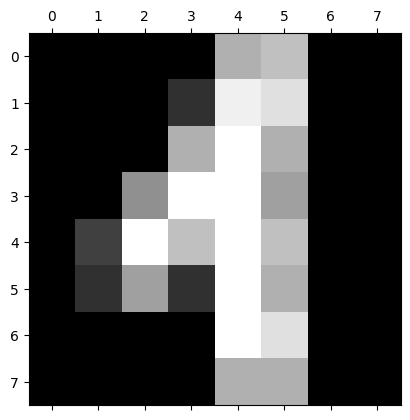

In [11]:
print('Predicted value is =', lm.predict([X_test[200]]))

print('Actual value from test data is %s and corresponding image is as below' % (y_test[200]) )
plt.matshow(digits_df.images[200]) 
plt.show() 

In [12]:
lm.score(X_test, y_test)

0.9694444444444444

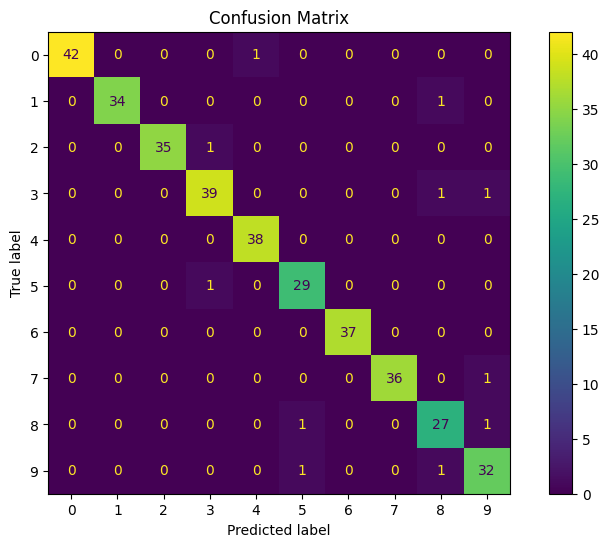

In [18]:
y_pred = lm.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=digits_df.target_names)
disp.plot(ax=ax)
plt.show()

In [19]:
print(metrics.classification_report(y_test, lm.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      0.97      0.99        35
           2       1.00      0.97      0.99        36
           3       0.95      0.95      0.95        41
           4       0.97      1.00      0.99        38
           5       0.94      0.97      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       0.90      0.93      0.92        29
           9       0.91      0.94      0.93        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

digits = datasets.load_digits()

digits_df = pd.DataFrame(data=digits.data, columns=digits.feature_names)

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_reg = LogisticRegression(max_iter=10000)
logistic_reg.fit(X_train, y_train)

lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)

svm_classifier = SVC(decision_function_shape='ovr')
svm_classifier.fit(X_train, y_train)

logistic_reg_score = logistic_reg.score(X_test, y_test)
print("Logistic Regression Accuracy:", logistic_reg_score)

lda_score = lda_classifier.score(X_test, y_test)
print("LDA Classifier Accuracy:", lda_score)

svm_score = svm_classifier.score(X_test, y_test)
print("SVM Classifier Accuracy:", svm_score)

Logistic Regression Accuracy: 0.9722222222222222
LDA Classifier Accuracy: 0.9444444444444444
SVM Classifier Accuracy: 0.9861111111111112
